In [1]:
import os

import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np


root_path = os.path.abspath(os.path.join(os.path.abspath(""), "../.."))

In [2]:
# set matplotlib default parameters
# mpl.rcParams["font.family"] = "sans-serif"
# mpl.rcParams["font.sans-serif"] = "Helvetica"
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = 7
mpl.rcParams["xtick.labelsize"] = 7
mpl.rcParams["xtick.major.size"] = 2
mpl.rcParams["xtick.minor.size"] = 1.2
mpl.rcParams["ytick.labelsize"] = 7
mpl.rcParams["ytick.major.size"] = 2
mpl.rcParams["ytick.minor.size"] = 1.2
mpl.rcParams["lines.linewidth"] = 1.2
mpl.rcParams["lines.markersize"] = 2
mpl.rcParams["lines.markeredgewidth"] = 0.5
mpl.rcParams["boxplot.flierprops.markersize"] = 2
mpl.rcParams["boxplot.flierprops.markeredgewidth"] = 0.5
mpl.rcParams["legend.fontsize"] = 7

CM = 1/2.54 # centimeters in inches

In [3]:
AUCs = pd.read_csv(f'{root_path}/data/empirical_auc.csv')
piQTLs = pd.read_csv(f'{root_path}/results/05_piQTL_tables/significant_piQTLs_results_with_genome_annotations_without_MTX_peaks.csv')

In [4]:
#### You need to remove the MTX-specific piQTLs before performing the other steps
MTX_QTLs = pd.read_csv(f'{root_path}/results/05_piQTL_tables/MTX_specific_QTLs_with_genome_annotations.csv')
MTX_QTLs['SNP_ID'] = [ f'CHR{MTX_QTLs["Chr"][idx]}_{MTX_QTLs["SNP"][idx]}' for idx in MTX_QTLs.index ]
MTX_piQTLs = list(MTX_QTLs['SNP_ID'])

MTX_piQTLs.append('CHR15_10435')
MTX_piQTLs.append('CHR15_10455')
MTX_piQTLs.append('CHR15_10468')

#### rMVP vs. eQTL matrix

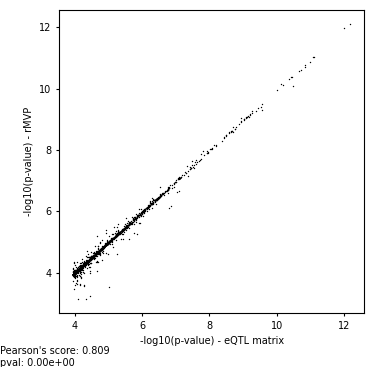

In [5]:
f= plt.figure(figsize=(10*CM,10*CM))
sns.scatterplot(x= - np.log10(piQTLs[piQTLs['FDR'] < 0.05]['p-value_eQTL']), y= - np.log10(piQTLs[piQTLs['FDR'] < 0.05]['p-value_rMVP']), color='black', marker='.', linewidth=0)
plt.xlabel('-log10(p-value) - eQTL matrix')
plt.ylabel('-log10(p-value) - rMVP')
# plt.xscale('log')
# plt.yscale('log')

corr, pval = stats.pearsonr(piQTLs[piQTLs['FDR'] < 0.05]['p-value_eQTL'], piQTLs[piQTLs['FDR'] < 0.05]['p-value_rMVP'])
plt.annotate(f"Pearson's score: {round(corr,3)}\npval: {'{:.2e}'.format(pval)}", xy=[0, 1], xycoords="figure points")

f.savefig(f'{root_path}/figures/supp_figures/correlation_eQTL-matrix_vs_rMVP_piQTL_only.eps', dpi=300)


In [6]:
all_results = pd.read_csv(f'{root_path}/results/05_piQTL_tables/all_piQTLs_results_with_genome_annotations_with_MTX_peaks.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/work/results/05_piQTL_tables/all_piQTLs_results_with_genome_annotations_with_MTX_peaks.csv'

In [ ]:
all_results_without_MTX = all_results[~all_results['SNP'].isin(list(MTX_QTLs['SNP']))]

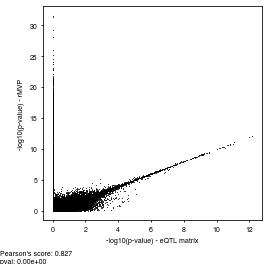

In [ ]:
f= plt.figure(figsize=(10*CM,10*CM))
sns.scatterplot(x= - np.log10(all_results_without_MTX['p-value_eQTL']), y= - np.log10(all_results_without_MTX['p-value_rMVP']), color='black', marker='.', linewidth=0)
plt.xlabel('-log10(p-value) - eQTL matrix')
plt.ylabel('-log10(p-value) - rMVP')

corr, pval = stats.pearsonr(all_results_without_MTX['p-value_eQTL'], all_results_without_MTX['p-value_rMVP'])
plt.annotate(f"Pearson's score: {round(corr,3)}\npval: {'{:.2e}'.format(pval)}", xy=[0, 1], xycoords="figure points")

f.savefig(f'{root_path}/figures/supp_figures/correlation_eQTL-matrix_vs_rMVP_without_MTX.eps', dpi=300)

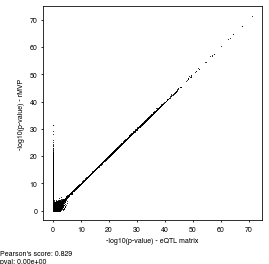

In [ ]:
f= plt.figure(figsize=(10*CM,10*CM))
sns.scatterplot(x= - np.log10(all_results['p-value_eQTL']), y= - np.log10(all_results['p-value_rMVP']), color='black', marker='.', linewidth=0)
plt.xlabel('-log10(p-value) - eQTL matrix')
plt.ylabel('-log10(p-value) - rMVP')

corr, pval = stats.pearsonr(all_results['p-value_eQTL'], all_results['p-value_rMVP'])
plt.annotate(f"Pearson's score: {round(corr,3)}\npval: {'{:.2e}'.format(pval)}", xy=[0, 1], xycoords="figure points")

f.savefig(f'{root_path}/figures/supp_figures/correlation_eQTL-matrix_vs_rMVP_all.eps', dpi=300)


In [ ]:
significant_piQTLs[significant_piQTLs['snps_class_up'] == 'Promoter']['locus_id'].replace('_NFR/NDR','')

8           SUT153_NFR/NDR
9           SUT153_NFR/NDR
16         YGL014W_NFR/NDR
26         YGL016W_NFR/NDR
53         YGL014W_NFR/NDR
               ...        
2104       YPR151C_NFR/NDR
2114       YNL222W_NFR/NDR
2118       YPR140W_NFR/NDR
2122    YHRCdelta4_NFR/NDR
2123        SUT153_NFR/NDR
Name: locus_id, Length: 375, dtype: object

In [ ]:
Fluconazole = significant_piQTLs[(significant_piQTLs['Condition'].str.contains('Fluconazole')) & (significant_piQTLs['snps_class_up'].isin(['ORF', 'Promoter', 'Close to 3\'-UTR']))].reset_index(drop=True)
Fluconazole['locus_id'] = [ Fluc['locus_id'][idx].replace('_NFR/NDR','') for idx in Fluconazole.index ]
Fluconazole.sort_values('-log_pval', ascending=False).drop_duplicates(subset='locus_id', keep='first')[['locus_id', 'FDR']].rename(columns={'FDR':'Fluconazole'}).to_csv('/home/savvy/bin/safe/safe-data/attributes/all_piQTLs_Fluconazole.txt', sep='\t', index=False)  # ToDo: modify output path

In [ ]:
Metformin = significant_piQTLs[(significant_piQTLs['Condition'].str.contains('Metformin')) & (significant_piQTLs['snps_class_up'].isin(['ORF', 'Promoter', 'Close to 3\'-UTR']))].reset_index(drop=True)
Metformin['locus_id'] = [ Metformin['locus_id'][idx].replace('_NFR/NDR','') for idx in Metformin.index ]
Metformin.sort_values('-log_pval', ascending=False).drop_duplicates(subset='locus_id', keep='first')[['locus_id', 'FDR']].rename(columns={'FDR':'Metformin'}).to_csv('/home/savvy/bin/safe/safe-data/attributes/all_piQTLs_Metformin.txt', sep='\t', index=False)  # ToDo: modify output path

In [ ]:
Trifluoperazine = significant_piQTLs[(significant_piQTLs['Condition'].str.contains('Trifluoperazine')) & (significant_piQTLs['snps_class_up'].isin(['ORF', 'Promoter', 'Close to 3\'-UTR']))].reset_index(drop=True)
Trifluoperazine['locus_id'] = [ Trifluoperazine['locus_id'][idx].replace('_NFR/NDR','') for idx in Trifluoperazine.index ]
Trifluoperazine.sort_values('-log_pval', ascending=False).drop_duplicates(subset='locus_id', keep='first')[['locus_id', 'FDR']].rename(columns={'FDR':'Trifluoperazine'}).to_csv('/home/savvy/bin/safe/safe-data/attributes/all_piQTLs_Trifluoperazine.txt', sep='\t', index=False)  # ToDo: modify output path

### Effect size vs AUC

In [ ]:
def get_condition(x):
    ppi = AUCs['ppi'][x].replace(':','_').replace('no-PPI_reference','noPPI_reference')
    drug = AUCs['drug'][x].replace('NoDrug','noDrug').replace('5FC', '5.FC')
    if AUCs['mtx'][x] == 0 :
        mtx = 'noMTX'
    else : 
        mtx = 'MTX'

    return f'{ppi}_{mtx}_{drug}'

In [ ]:
significant_piQTLs = piQTLs[piQTLs['FDR'] < 0.05].reset_index(drop=True)
significant_piQTLs = significant_piQTLs.replace('Intergenic region', 'Other features')
significant_piQTLs = significant_piQTLs.replace('Non-coding RNA', 'Other features')
significant_piQTLs['PPI'] = [ f"{significant_piQTLs['Condition'][idx].split('_')[0]}:{significant_piQTLs['Condition'][idx].split('_')[1]}" for idx in significant_piQTLs.index ] 


AUCs['Condition'] = [ get_condition(idx) for idx in AUCs.index ] 

es_vs_auc = significant_piQTLs[['SNP','Condition','Effect', 'snps_class_up']].merge(AUCs[['Condition', 'ppi', 'drug', 'auc_average']], on='Condition')

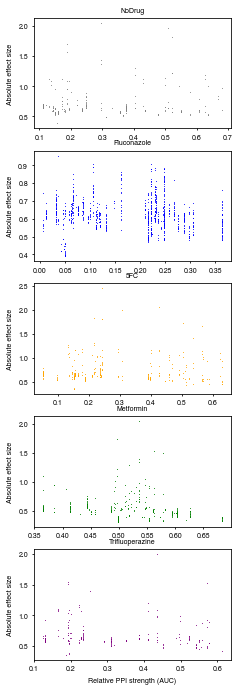

In [ ]:
i = 0

drug_color={'NoDrug':'grey',
    'Fluconazole':'blue',
    '5FC':'orange',
    'Metformin':'green',
    'Trifluoperazine':'purple'}

f, axes= plt.subplots(figsize=(9*CM,30*CM), nrows=5, sharey=False, sharex=False)
for DRUG in ['NoDrug', 'Fluconazole', '5FC', 'Metformin', 'Trifluoperazine']:
    TMP = es_vs_auc[es_vs_auc['drug'] == DRUG ]
    sns.scatterplot(y=np.abs(TMP['Effect']), x=TMP['auc_average'], ax=axes[i], marker='.', linewidth=0, color=drug_color[DRUG])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Absolute effect size')
    axes[i].set_title(DRUG)
    axes[i].tick_params('x', labelbottom=True)
    plt.xlabel('Relative PPI strength (AUC)')
    i += 1

f.savefig(f'{root_path}/figures/supp_figures/effect_size_vs_auc_byDrug_xautoscaled.eps', dpi=300)

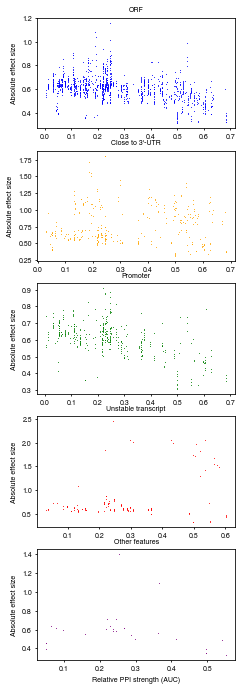

In [ ]:
i = 0

class_color = {
    'ORF':'blue',
    'Close to 3\'-UTR':'orange',
    'Promoter':'green',
    'Unstable transcript':'red',
    'Other features':'purple'
    }

f, axes= plt.subplots(figsize=(9*CM,30*CM), nrows=5, sharey=False, sharex=False)
for CLASS in ['ORF', 'Close to 3\'-UTR', 'Promoter', 'Unstable transcript', 'Other features']:
    TMP = es_vs_auc[es_vs_auc['snps_class_up'] == CLASS ]
    sns.scatterplot(y=np.abs(TMP['Effect']), x=TMP['auc_average'], ax=axes[i], marker='.', linewidth=0, color=class_color[CLASS])
    axes[i].set_title(CLASS)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Absolute effect size')
    axes[i].tick_params('x', labelbottom=True)
    plt.xlabel('Relative PPI strength (AUC)')
    i += 1
f.savefig(f'{root_path}/figures/supp_figures/effect_size_vs_auc_byClass_xautoscaled.eps', dpi=300)